# Problem Statement
You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile.The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

In [173]:
# Importing Libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [174]:
# Loading  loan details to data frame
initial_loan_data_frame=pd.read_csv('loan.csv',encoding='UTF_8',low_memory=False)
print('No.Of Rows and Columns in data frame:',initial_loan_data_frame.shape)

No.Of Rows and Columns in data frame: (39717, 111)


# DATA CLEANING

### Fixing Columns




In [175]:
# No.Of Columns having 100% NA values
(initial_loan_data_frame.isna().mean().round(4)*100==100.00).sum()

54

In [176]:
# Removing columns having 100% NA values
initial_loan_data_frame.dropna(axis=1,how='all',inplace=True)
print('No.Of Rows and Columns in data frame:',initial_loan_data_frame.shape)

No.Of Rows and Columns in data frame: (39717, 57)


In [177]:
# Removing the Columns which had NA % > 60
# mths_since_last_delinq 64.66% ; mths_since_last_record 92.99% ; next_pymnt_d 97.13% NA Values 
initial_loan_data_frame.drop(['mths_since_last_delinq','mths_since_last_record','next_pymnt_d'],axis=1,inplace=True)
print('No.Of Rows and Columns in data frame:',initial_loan_data_frame.shape)

No.Of Rows and Columns in data frame: (39717, 54)


### Fixing Rows

| Column  Name                | % of NA |
|-----------------------------|---------|
| emp_title                   | 6.19    |
| emp_length                  | 2.71    |
| desc                        | 32.58   |
| title                       | 0.03    |
| revol_util                  | 0.13    |
| last_pymnt_d                | 0.18    |
| last_credit_pull_d          | 0.01    |
| collections_12_mths_ex_med  | 0.14    |
| chargeoff_within_12_mths    | 0.14    |
| pub_rec_bankruptcies        | 1.75    |
| tax_liens                   | 0.1     |

In [178]:
#Replacing NA with highest value or most repeated value in that column
initial_loan_data_frame['emp_length'] = initial_loan_data_frame['emp_length'].fillna('10+ years')
initial_loan_data_frame['title'] = initial_loan_data_frame['title'].fillna('Debt Consolidation')
initial_loan_data_frame['revol_util'] = initial_loan_data_frame['revol_util'].fillna('0%')
initial_loan_data_frame['last_pymnt_d'] = initial_loan_data_frame['last_pymnt_d'].fillna('May-16')
initial_loan_data_frame['last_credit_pull_d'] = initial_loan_data_frame['last_credit_pull_d'].fillna('May-16')
initial_loan_data_frame['collections_12_mths_ex_med'] = initial_loan_data_frame['collections_12_mths_ex_med'].fillna(0.0)
initial_loan_data_frame['chargeoff_within_12_mths'] = initial_loan_data_frame['chargeoff_within_12_mths'].fillna(0.0)
initial_loan_data_frame['pub_rec_bankruptcies'] = initial_loan_data_frame['pub_rec_bankruptcies'].fillna(0.0)
initial_loan_data_frame['tax_liens'] = initial_loan_data_frame['tax_liens'].fillna(0.0)

In [179]:
# initial_loan_data_frame['tax_liens'].value_counts()
# Will provide value and its count 

#### Delecting the columns listed below because all rows have same value
| COLUMNS                        |                                                                                                                                     |
| ------------------------------ | ----------------------------------------------------------------------------------------------------------------------------------- |
| pymnt\_plan                    | is n for all rows\[Indicates if a payment plan has been put in place for the loan\]                                                 |
| url                            | is unique for every customer \[URL for the LC page with listing data.\]                                                             |
| initial\_list\_status          | is f for all rows \[The initial listing status of the loan. Possible values are – W,F\]                                             |
| collections\_12\_mths\_ex\_med | is 0 for rows \[Number of collections in 12 months excluding medical collections\]                                                  |
| policy\_code                   | is 1 for all rows \[publicly available policy\_code=1, new products not publicly available policy\_code=2\]                         |
| application\_type              | is INDIVIDUAL for all rows \[Indicates whether the loan is an individual application or a joint application with two co-borrowers\] |
| acc\_now\_delinq               | is 0 for all rows \[The number of accounts on which the borrower is now delinquent.\]                                               |
| chargeoff\_within\_12\_mths    | is zero for all rows \[Number of charge-offs within 12 months\]                                                                     |
| delinq\_amnt                   | is zero for all rows \[The past-due amount owed for the accounts on which the borrower is now delinquent.\]                         |
| tax\_liens                     | is zero for all rows \[Number of tax liens\]                                                                                        |


In [180]:
initial_loan_data_frame.drop(['pymnt_plan','url','initial_list_status','collections_12_mths_ex_med',
                              'policy_code','application_type','acc_now_delinq','chargeoff_within_12_mths',
                              'delinq_amnt','tax_liens'],axis=1,inplace=True)
# Removing desc column same data avilable in title column
initial_loan_data_frame.drop('desc',axis=1,inplace=True)
# Removing rows from emp_title with NA values
initial_loan_data_frame=initial_loan_data_frame[~initial_loan_data_frame.emp_title.isnull()]
# Drop columns which are unique for each row like custmoer id 
initial_loan_data_frame.drop(['id','member_id'],axis=1,inplace=True)

In [181]:
# Dropping columns which are similar to each other 
# funded_amnt is similar to loan_amnt we can drop funded_amnt
# funded_amnt_inv is similar to loan_amnt we can drop funded_amnt_inv
# zip_codedd 2 digit is masked only 3 digit is avilable not useull for anaysis
# Removing above 3 columns they dont much cotribute to anaysis
initial_loan_data_frame.drop(['funded_amnt','funded_amnt_inv','zip_code'],axis=1,inplace=True)
print('No.Of Rows and Columns in data frame:',initial_loan_data_frame.shape)

No.Of Rows and Columns in data frame: (37258, 38)


In [182]:
# % of NA values in columns listed below except emp_title & desc columns replaced all other column NA values.
initial_loan_data_frame.isna().mean().round(4)*100

loan_amnt                  0.0
term                       0.0
int_rate                   0.0
installment                0.0
grade                      0.0
sub_grade                  0.0
emp_title                  0.0
emp_length                 0.0
home_ownership             0.0
annual_inc                 0.0
verification_status        0.0
issue_d                    0.0
loan_status                0.0
purpose                    0.0
title                      0.0
addr_state                 0.0
dti                        0.0
delinq_2yrs                0.0
earliest_cr_line           0.0
inq_last_6mths             0.0
open_acc                   0.0
pub_rec                    0.0
revol_bal                  0.0
revol_util                 0.0
total_acc                  0.0
out_prncp                  0.0
out_prncp_inv              0.0
total_pymnt                0.0
total_pymnt_inv            0.0
total_rec_prncp            0.0
total_rec_int              0.0
total_rec_late_fee         0.0
recoveri

In [183]:
# Columns values with more than 2 precision values need to be round to 2 decimal places
initial_loan_data_frame.total_pymnt=round(initial_loan_data_frame.total_pymnt,2)
initial_loan_data_frame.total_rec_late_fee=round(initial_loan_data_frame.total_rec_late_fee,2)
initial_loan_data_frame.collection_recovery_fee=round(initial_loan_data_frame.collection_recovery_fee,2)

In [184]:
# For date fileds converting dtype to date type from object type
initial_loan_data_frame.issue_d = pd.to_datetime(initial_loan_data_frame.issue_d, format='%b-%y')
initial_loan_data_frame.earliest_cr_line = pd.to_datetime(initial_loan_data_frame.earliest_cr_line, format='%b-%y')
initial_loan_data_frame.last_pymnt_d = pd.to_datetime(initial_loan_data_frame.last_pymnt_d, format='%b-%y')
initial_loan_data_frame.last_credit_pull_d = pd.to_datetime(initial_loan_data_frame.last_credit_pull_d, format='%b-%y')

In [185]:
# Removing rows from loan_status column which had  Current value
initial_loan_data_frame = initial_loan_data_frame[initial_loan_data_frame['loan_status'].isin(['Fully Paid','Charged Off'])]
#drop duplicate rows
initial_loan_data_frame=initial_loan_data_frame.drop_duplicates()
print('No.Of Rows and Columns in data frame:',initial_loan_data_frame.shape)

No.Of Rows and Columns in data frame: (36191, 38)


In [186]:
# Columns expressing % like int_rate and revol_util in there values and its dtype is object we are converting them to flot dtype
initial_loan_data_frame['int_rate'] = initial_loan_data_frame['int_rate'].str.strip('%').astype('float')
initial_loan_data_frame['revol_util'] = initial_loan_data_frame['revol_util'].str.strip('%').astype('float')

In [187]:
# We got data until 2011 [ It contains the complete loan data for all loans issued through the time period 2007 t0 2011.]
len(initial_loan_data_frame[initial_loan_data_frame['earliest_cr_line'] .dt.year> 2011 ])

50

In [188]:
# Creating month and year columns for datetime dtype
initial_loan_data_frame['month_earliest_cr_line'] = initial_loan_data_frame['earliest_cr_line'].dt.month
initial_loan_data_frame['year_earliest_cr_line'] = initial_loan_data_frame['earliest_cr_line'].dt.year
initial_loan_data_frame['month_issue_d'] = initial_loan_data_frame['issue_d'].dt.month
initial_loan_data_frame['year_issue_d'] = initial_loan_data_frame['issue_d'].dt.year

In [189]:
# Find the rows with more than 2011 and fix them
print(initial_loan_data_frame[initial_loan_data_frame['earliest_cr_line'] .dt.year > 2011 ]['earliest_cr_line'] .dt.year.unique())
# Issue while reading year as object with 2 digit assuming -100 will bring them to in range
initial_loan_data_frame.loc[initial_loan_data_frame['year_earliest_cr_line']> 2011 , 'year_earliest_cr_line'] = initial_loan_data_frame['year_earliest_cr_line'] - 100
#Removing months from term column
initial_loan_data_frame['term'] = initial_loan_data_frame.term.apply(lambda x: x.split()[0])

[2068 2067 2065 2063 2066 2062 2056 2046 2050 2064 2054]


# Univariate  & Segmented Analysis 

### Meta data for columns 

column-- column name<br>
type--dtype of the column<br>
type_anaysis--based on column values it belong to order,unorder or segmented anaysis<br>
unique values--if value are limited or segmented it is captured if values are more than 20 it mentioned as NA<br>
Len unique values-- Total number of unique values in that column<br>

| Column                  | type    | type_anaysis | unique values                                                          | Len unique   values |
|-------------------------|---------|--------------|------------------------------------------------------------------------|---------------------|
| loan_amnt               | int64   | ordered      | NA                                                                     | 875                 |
| term                    |  object | segmented    | 36 months,60 months                                                    | 2                   |
| int_rate                |  object | ordered      | NA                                                                     | 368                 |
| installment             | float64 | ordered      | NA                                                                     | 14800               |
| grade                   |  object | segmented    | B A C D E F G                                                          | 7                   |
| sub_grade               |  object | segmented    | B3   A4 B5 A5 B4 C1 B2 etc                                             | 35                  |
| emp_title               |  object | ordered      | NA                                                                     | 28820               |
| emp_length              |  object | segmented    | 10+   years 2 years          < 1 year 3   years etc                    | 11                  |
| home_ownership          |  object | segmented    | RENT      MORTGAGE  OWN         OTHER     NONE                         | 5                   |
| annual_inc              | float64 | ordered      | NA                                                                     | 5001                |
| verification_status     |  object | segmented    | NotVerified      Verified                Source Verified               | 3                   |
| issue_d                 |  object | date field   |                                                                        |                     |
| loan_status             |  object | segmented    | FullyPaid  Charged Off                                                 | 2                   |
| purpose                 |  object | segmented    | debt_consolidation         credit_card              other         etc  | 14                  |
| title                   |  object | unordered    | NA                                                                     | 18417               |
| addr_state              |  object | unordered    | NA                                                                     | 50                  |
| dti                     | float64 | ordered      | NA                                                                     | 2857                |
| delinq_2yrs             |   int64 | segmented    | 0   to 13                                                              | 11                  |
| earliest_cr_line        |  object | date field   |                                                                        |                     |
| inq_last_6mths          |   int64 | segmented    | 0   to 8                                                               | 9                   |
| open_acc                |   int64 | segmented    | NA                                                                     | 40                  |
| pub_rec                 |   int64 | segmented    | 0   to 4                                                               | 5                   |
| revol_bal               |   int64 | ordered      | NA                                                                     | 21034               |
| revol_util              |  object | ordered      | NA                                                                     | 1082                |
| total_acc               |   int64 | ordered      | NA                                                                     | 80                  |
| out_prncp               | float64 | ordered      | NA                                                                     | 1065                |
| out_prncp_inv           | float64 | ordered      | NA                                                                     | 1066                |
| total_pymnt             | float64 | ordered      | NA                                                                     | 35603               |
| total_pymnt_inv         | float64 | ordered      | NA                                                                     | 35311               |
| total_rec_prncp         | float64 | ordered      | NA                                                                     | 7406                |
| total_rec_int           | float64 | ordered      | NA                                                                     | 33189               |
| total_rec_late_fee      | float64 | ordered      | NA                                                                     | 1249                |
| recoveries              | float64 | ordered      | NA                                                                     | 3717                |
| collection_recovery_fee | float64 | ordered      | NA                                                                     | 2439                |
| last_pymnt_d            |  object | date filed   |                                                                        | 101                 |
| last_pymnt_amnt         | float64 | ordered      | NA                                                                     | 33086               |
| last_credit_pull_d      |  object | date field   |                                                                        | 106                 |
| pub_rec_bankruptcies    | float64 | segmented    | 0.0 1.0 2.0                                                            | 3                   |

In [190]:
# Coverting loan_status values to 0-- fully paid & 1--charged off
initial_loan_data_frame.replace(to_replace='Fully Paid',value=0,inplace=True)
initial_loan_data_frame.replace(to_replace='Charged Off',value=1,inplace=True)
initial_loan_data_frame.loan_status.unique()

array([1, 0], dtype=int64)

In [191]:
# function to draw varibales accross default in %
def loanstatus(dataframe, column_name, status=1):
    grps = dataframe.groupby(['loan_status',column_name])[column_name].count()
    cnt = dataframe.groupby(column_name)[column_name].count()
    percentage = grps.unstack() * 100 / cnt.T
    plot_graph = percentage.loc[status].plot.bar(color=sns.color_palette('husl', 16))
    plot_graph.set_ylabel('% of loans ' + str(status))
    plt.margins(0.2, 0.2)
    plt.tight_layout()
    return plot_graph

Text(0.5, 1.0, 'Plot for Default and Non default Customers')

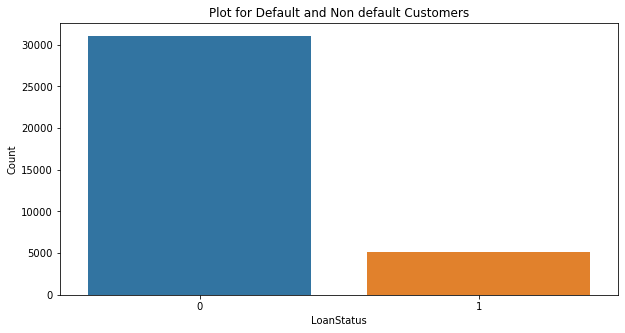

In [192]:
plt.figure(figsize=(10,5))
ls=sns.countplot(x=initial_loan_data_frame['loan_status'],data=initial_loan_data_frame)
ls.set(xlabel="LoanStatus", ylabel = "Count")
ls.set_title("Plot for Default and Non default Customers")

In [193]:
initial_loan_data_frame.groupby(['loan_status']).loan_status.count()

loan_status
0    31048
1     5143
Name: loan_status, dtype: int64

In [194]:
default_per=(initial_loan_data_frame.loan_status.isin([1]).sum()*100)/initial_loan_data_frame.loan_status.count()
print(round(default_per,2))

14.21


### The default or chargeoff % is 14.21%  any variable which increase % of default more than ~18% will lead to default 

#### loan_amnt
The listed amount of ,the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

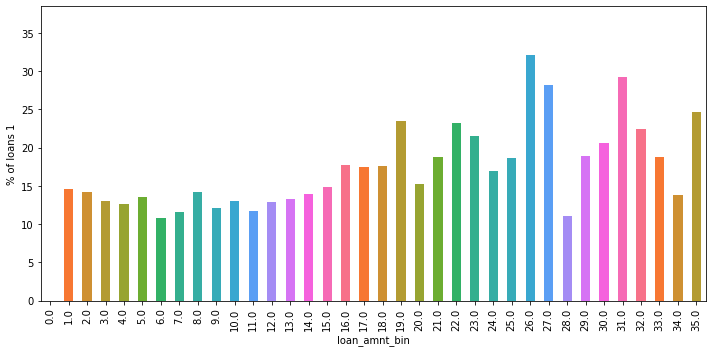

In [195]:
initial_loan_data_frame['loan_amnt_bin'] = round(initial_loan_data_frame['loan_amnt']/1000)
plt.figure(figsize=(10,5))
lb=loanstatus(initial_loan_data_frame,'loan_amnt_bin')

observations:<br>
    when loan amount is higher the risk for default is high

#### term
The number of payments on the loan. Values are in months and can be either 36 or 60.

Text(0.5, 1, 'Plot for term and default Customers.')

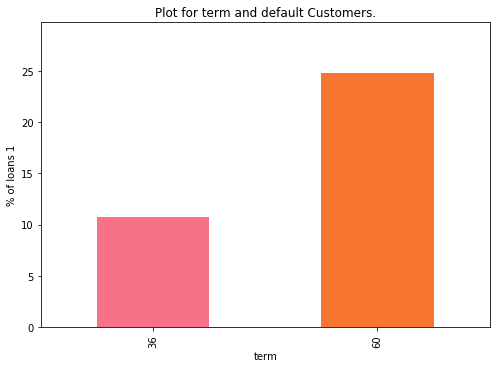

In [196]:
plt.figure(figsize=(7,5))
tr=loanstatus(initial_loan_data_frame,'term')
tr.set_title("Plot for term and default Customers.")

observations:<br>
    For high term risk for default is high

#### int_rate
Interest Rate on the loan

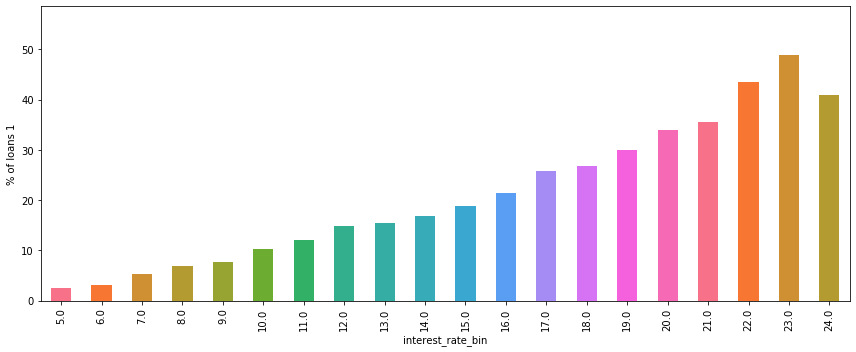

In [197]:
initial_loan_data_frame['interest_rate_bin'] = round(initial_loan_data_frame['int_rate'])
plt.figure(figsize=(12,5))
loanstatus(initial_loan_data_frame, 'interest_rate_bin')

observations:<br>
    For high interest risk for default is high, It is common to give high % interest for high risk customers

#### installment
The monthly payment owed by the borrower if the loan originates.

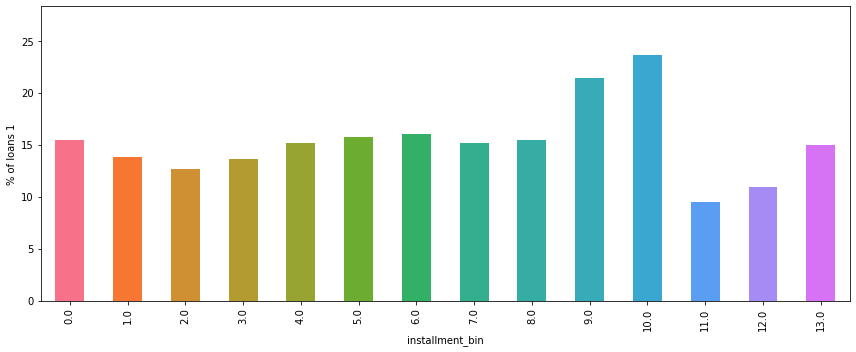

In [198]:
initial_loan_data_frame['installment_bin'] = round(initial_loan_data_frame['installment']/100)
plt.figure(figsize=(12,5))
loanstatus(initial_loan_data_frame, 'installment_bin')

observations:<br>
    When loan installment is high risk of default is high

#### grade
LC assigned loan grade

Text(0.5, 1, 'Plot for grade and default Customers.')

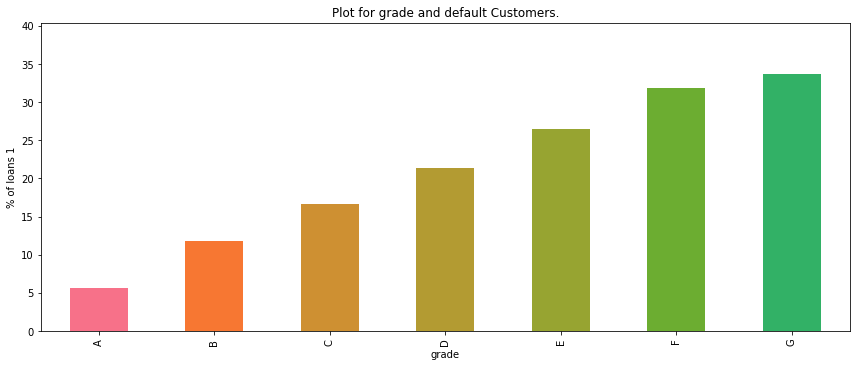

In [199]:
plt.figure(figsize=(12,5))
gr=loanstatus(initial_loan_data_frame, 'grade')
gr.set_title("Plot for grade and default Customers.")

observations:<br>
    From Garde E to G the risk for default is high.

#### sub_grade
LC assigned loan subgrade

Text(0.5, 1, 'Plot for sub_grade and default Customers.')

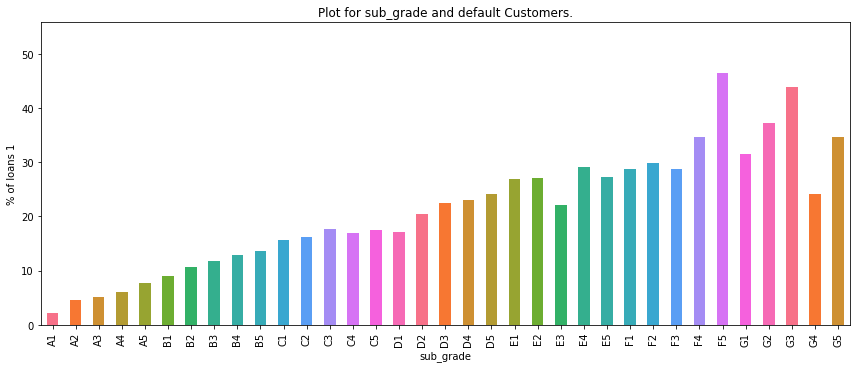

In [200]:
plt.figure(figsize=(12,5))
sg=loanstatus(initial_loan_data_frame, 'sub_grade')
sg.set_title("Plot for sub_grade and default Customers.")

observations:<br>
    As alredy grade E to G at risk the sub grades belong to them will also be in risk

#### emp_title
The job title supplied by the Borrower when applying for the loan.

Text(0.5, 1, 'Plot for emp_title and default Customers.')

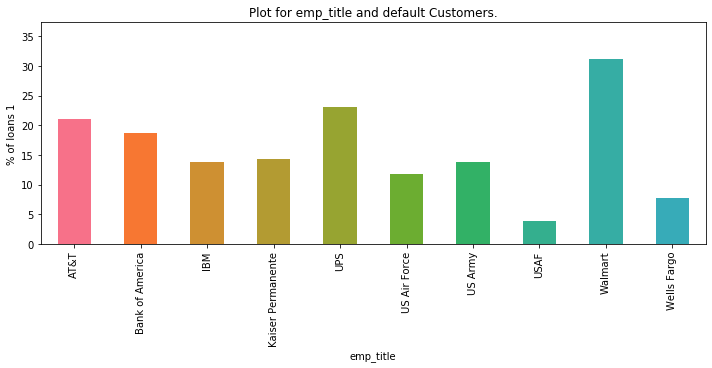

In [201]:
top10_emp = initial_loan_data_frame.emp_title.value_counts(normalize=False).head(10)
plt.figure(figsize=(10,5))
et=loanstatus(initial_loan_data_frame[initial_loan_data_frame['emp_title'].isin(top10_emp.index.values)], 'emp_title')
et.set_title("Plot for emp_title and default Customers.")

observations:<br>
    We observe some emp had high risk of default

#### emp_length
Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.

Text(0.5, 1, 'Plot for emp_length and default Customers.')

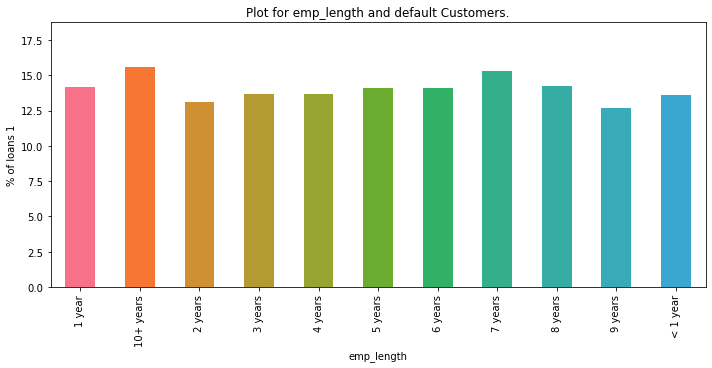

In [202]:
plt.figure(figsize=(10,5))
sg=loanstatus(initial_loan_data_frame, 'emp_length')
sg.set_title("Plot for emp_length and default Customers.")

observations:<br>
    emp_length had no impact on default.

#### home_ownership
The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.

Text(0.5, 1, 'Plot for home_ownership and default Customers.')

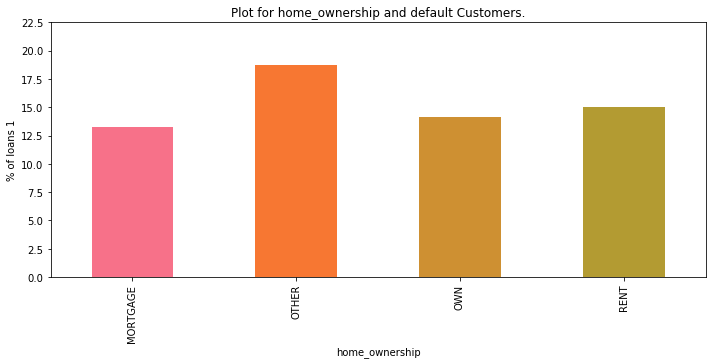

In [203]:
plt.figure(figsize=(10,5))
initial_loan_data_frame=initial_loan_data_frame[~initial_loan_data_frame.home_ownership.isin(['NONE'])]
ho=loanstatus(initial_loan_data_frame, 'home_ownership')
ho.set_title("Plot for home_ownership and default Customers.")

observations:<br>
    home_ownership not make any impact on default on loan

#### verification_status
Indicates if income was verified by LC, not verified, or if the income source was verified

Text(0.5, 1, 'Plot for verification_status and default Customers.')

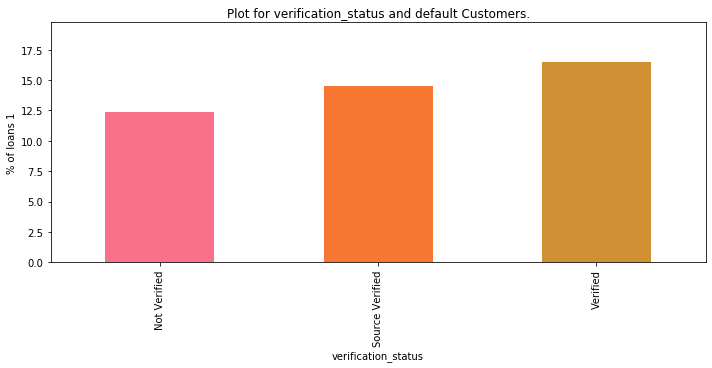

In [204]:
plt.figure(figsize=(10,5))
vs=loanstatus(initial_loan_data_frame, 'verification_status')
vs.set_title("Plot for verification_status and default Customers.")

observations:<br>
    Verification status not effect default loan

#### issue_d
The month which the loan was funded

Text(0.5, 1, 'Plot for year_issue_d and default Customers.')

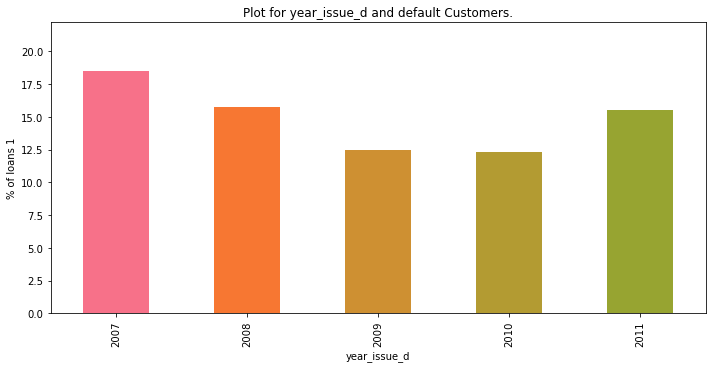

In [205]:
plt.figure(figsize=(10,5))
id_y=loanstatus(initial_loan_data_frame, 'year_issue_d')
id_y.set_title("Plot for year_issue_d and default Customers.")

observations:<br>
    issue_d had no effect on default loans

#### purpose
A category provided by the borrower for the loan request.

Text(0.5, 1, 'Plot for purpose and default Customers.')

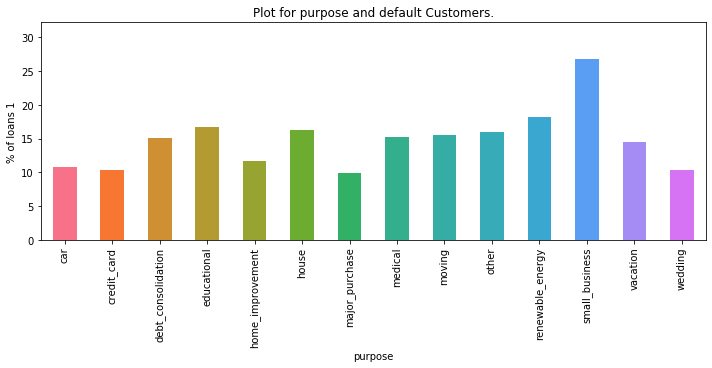

In [206]:
plt.figure(figsize=(10,5))
pu=loanstatus(initial_loan_data_frame, 'purpose')
pu.set_title("Plot for purpose and default Customers.")

observations:<br>
    small_business purpose had high risk default loans.

#### title
The loan title provided by the borrower

observations:<br>
title is alredy covered in other column anaysis we can ignore this column for anaysis

#### addr_state
The state provided by the borrower in the loan application

Text(0.5, 1, 'Plot for addr_state and default Customers.')

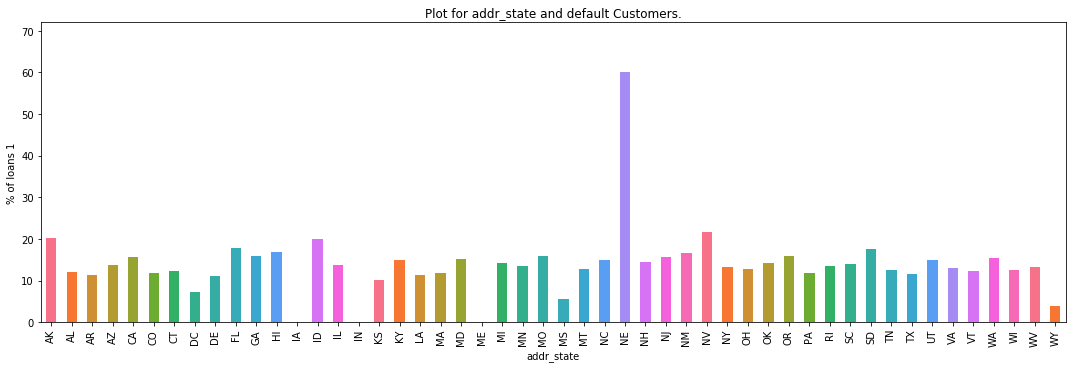

In [207]:
plt.figure(figsize=(15,5))
addr=loanstatus(initial_loan_data_frame, 'addr_state')
addr.set_title("Plot for addr_state and default Customers.")

observations:<br>
    State variable will effect dafault loans we can observe more details in bivariant anaysis

#### dti
A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, 
excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

Text(0.5, 1, 'Plot for dti and default Customers.')

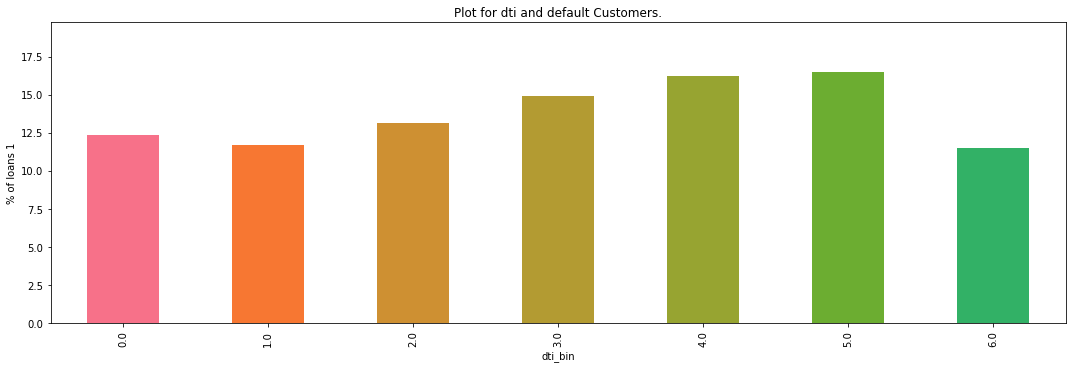

In [208]:
initial_loan_data_frame['dti_bin'] = round(initial_loan_data_frame['dti']/5)
plt.figure(figsize=(15,5))
addr=loanstatus(initial_loan_data_frame, 'dti_bin')
addr.set_title("Plot for dti and default Customers.")

observations:<br>
    dti will not effect default loans

#### delinq_2yrs
The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years

Text(0.5, 1, 'Plot for delinq_2yrs and default Customers.')

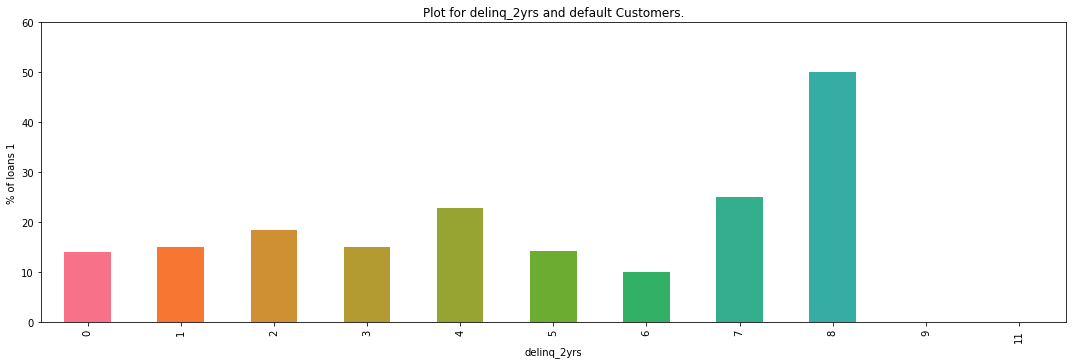

In [209]:
plt.figure(figsize=(15,5))
del2=loanstatus(initial_loan_data_frame, 'delinq_2yrs')
del2.set_title("Plot for delinq_2yrs and default Customers.")

observations:<br>
   As delinq_2yrs is high the risk for default loans also high

#### earliest_cr_line  variables month and year plot 
The month the borrower's earliest reported credit line was opened

Text(0.5, 1, 'Plot for year_earliest_cr_line and default Customers in %')

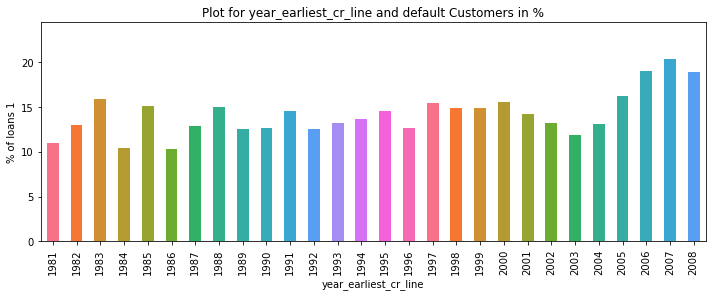

In [210]:
# plot to understand month and year of earliest_cr_line
plt.figure(figsize=(10,4))
cr_year=loanstatus(initial_loan_data_frame.loc[initial_loan_data_frame['year_earliest_cr_line'] > 1980], 'year_earliest_cr_line')
cr_year.set_title("Plot for year_earliest_cr_line and default Customers in %")

Observations:<br>
    Year's 2006,2007 and 2008 is having 18% default In those years world faced economic crises.<br>
    so we can ignore earliest_cr_line for our anaysis

#### inq_last_6mths
The number of inquiries in past 6 months (excluding auto and mortgage inquiries)

Text(0.5, 1, 'Plot for inq_last_6mths and default Customers in %')

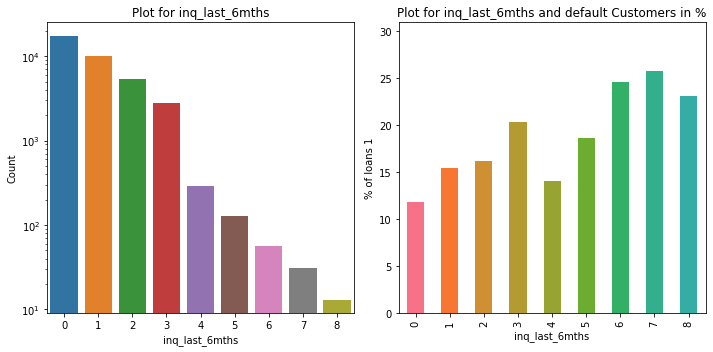

In [211]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
ls=sns.countplot(x=initial_loan_data_frame['inq_last_6mths'],data=initial_loan_data_frame)
ls.set(xlabel="inq_last_6mths", ylabel = "Count")
ls.set_title("Plot for inq_last_6mths")
ls.set_yscale('log')
plt.subplot(1,2,2)
inq=loanstatus(initial_loan_data_frame,'inq_last_6mths')
inq.set_title("Plot for inq_last_6mths and default Customers in %")

observations:<br>
    inq_last_6mths: The number of inquiries in past 6 months (excluding auto and mortgage inquiries)
If inq_last_6mths is more than 2 times it is causing >18% in default when a person having more loans he will have more inquiry<br> 
we can ignore this column for our anaysis.  

#### open_acc
The number of open credit lines in the borrower's credit file.

Text(0.5, 1.0, 'Plot for open_acc and default Customers.')

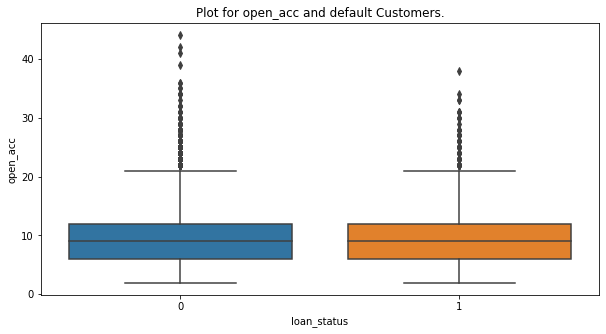

In [212]:
plt.figure(figsize=(10,5))
oa = sns.boxplot(y="open_acc",x="loan_status",data=initial_loan_data_frame)
oa.set_title("Plot for open_acc and default Customers.")

observations:<br>
    The Mean, Meadian, 25%, 75% is same for default and non default.<br>
    We can ignore this column for default anaysis    

#### pub_rec
Number of derogatory public records

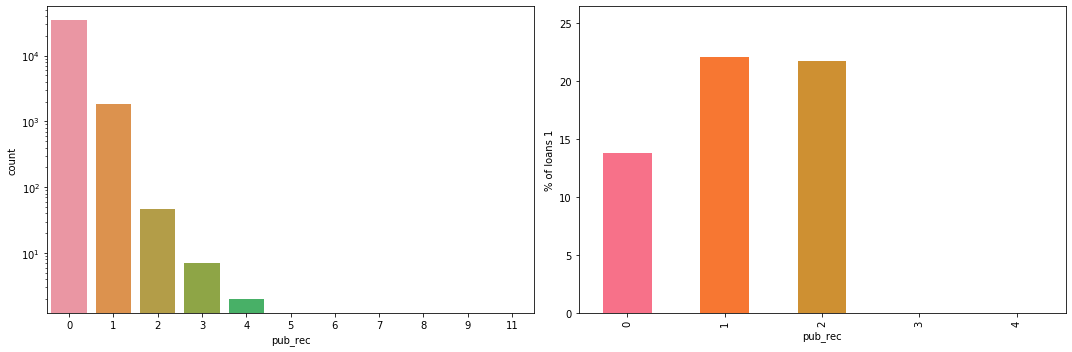

In [213]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
pr=sns.countplot(initial_loan_data_frame['pub_rec'], order=sorted(initial_loan_data_frame.delinq_2yrs.unique()))
pr.set_yscale('log')
plt.subplot(1, 2, 2)
pr_s=loanstatus(initial_loan_data_frame,'pub_rec')
plt.show()

observations:<br>
    Having more that 1 Number of derogatory public records will cause default loan<br>
    It will effect default % if a person had pr derogatory >=1 risk of defaulter.

#### revol_bal
Total credit revolving balance

Text(0.5, 1.0, 'Plot for revol_bal and default Customers.')

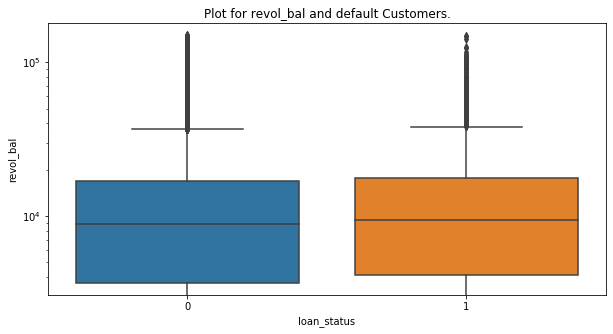

In [214]:
plt.figure(figsize=(10,5))
rb = sns.boxplot(y="revol_bal",x="loan_status",data=initial_loan_data_frame)
rb.set_yscale('log')
rb.set_title("Plot for revol_bal and default Customers.")

observations:<br>
The Mean, Meadian, 25%, 75% is same for default and non default.<br>
We can ignore this column for default anaysis

#### revol_util
Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

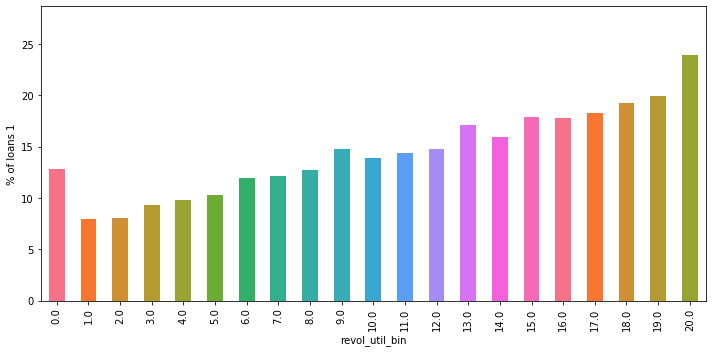

In [215]:
initial_loan_data_frame['revol_util_bin'] = round(initial_loan_data_frame['revol_util']/5)
plt.figure(figsize=(10,5))
ru=loanstatus(initial_loan_data_frame,'revol_util_bin')

observations:<br>
    When revol_util_bin is above 15 this variable lead to defaulter<br>
    When revol_util_bin is >15 high risk for defaulter    

#### total_acc
The total number of credit lines currently in the borrower's credit file

Text(0.5, 1.0, 'Plot for total_acc and default Customers.')

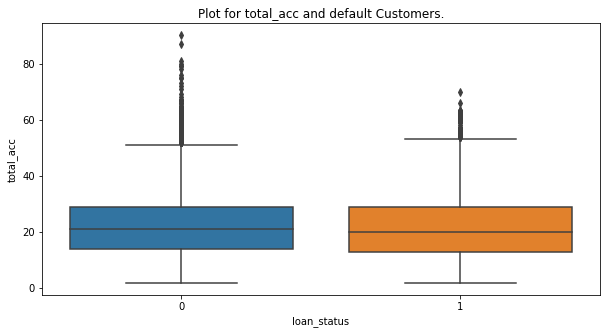

In [216]:
plt.figure(figsize=(10,5))
ta = sns.boxplot(y="total_acc",x="loan_status",data=initial_loan_data_frame)
ta.set_title("Plot for total_acc and default Customers.")

observations:<br>
The Mean, Meadian, 25%, 75% is same for default and non default.<br>
We can ignore this column for default anaysis

#### out_prncp
Remaining outstanding principal for total amount funded

In [217]:
initial_loan_data_frame.out_prncp.unique()

array([0.])

observations:<br>
    out_prncp is 0 for all rows, Hece we removed rows related to current in loan_status

#### out_prncp_inv
Remaining outstanding principal for portion of total amount funded by investors

In [218]:
initial_loan_data_frame.out_prncp_inv.unique()

array([0.])

observations:<br>
out_prncp_inv is 0 for all rows, Hece we removed rows related to current in loan_status

#### total_pymnt
Payments received to date for total amount funded

observations:<br>
    This variable not avilable during the loan approval so we can ignore this column

#### total_pymnt_inv
Payments received to date for portion of total amount funded by investors

observations:<br>
This variable not avilable during the loan approval so we can ignore this column

#### total_rec_prncp
Principal received to date

observations:
This variable not avilable during the loan approval so we can ignore this column

#### total_rec_int
Interest received to date

observations: <br>
    This variable not avilable during the loan approval so we can ignore this column

#### total_rec_late_fee
Late fees received to date

observations:<br>
This variable not avilable during the loan approval so we can ignore this column

#### recoveries
post charge off gross recovery

observations:<br>
This variable not avilable during the loan approval so we can ignore this column

#### collection_recovery_fee
post charge off collection fee

observations:<br>
This variable not avilable during the loan approval so we can ignore this column

#### last_pymnt_d
Last month payment was received

In [219]:
initial_loan_data_frame['month_last_pymnt_d']= initial_loan_data_frame['last_pymnt_d'].dt.month
initial_loan_data_frame['year_last_pymnt_d']= initial_loan_data_frame['last_pymnt_d'].dt.year

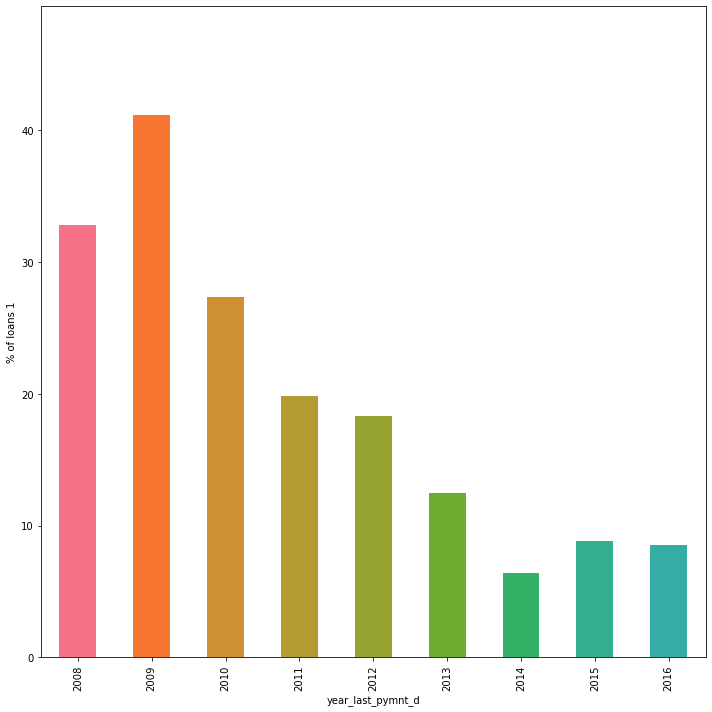

In [220]:
plt.figure(figsize=(10,10))
ly=loanstatus(initial_loan_data_frame, 'year_last_pymnt_d')

observations:<br>
    last payment date around 2008 to 2010 lead to defaulter<br>
    we can ignore this column because in that time economic crisis was reason for that late payment

#### last_pymnt_amnt
Last total payment amount received

observations:<br>
This variable not avilable during the loan approval so we can ignore this column

#### last_credit_pull_d
The most recent month LC pulled credit for this loan

observations:<br>
Usually bank will pull creidt report when we apply loan bank pull report which will not decide default<br>
we can ignore this column for anaysis

#### pub_rec_bankruptcies
Number of public record bankruptcies

Text(0.5, 1, 'Plot for pub_rec_bankruptcies and default Customers.')

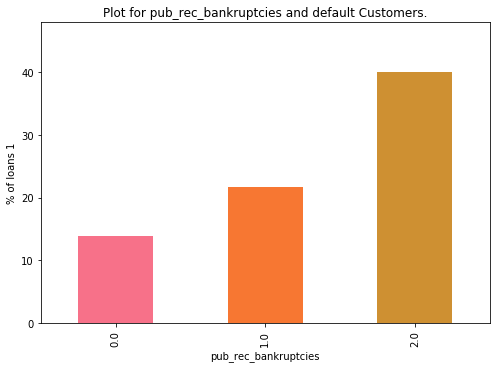

In [221]:
plt.figure(figsize=(7,5))
pb=loanstatus(initial_loan_data_frame,'pub_rec_bankruptcies')
pb.set_title("Plot for pub_rec_bankruptcies and default Customers.")

observations:<br>
    When no.of public record bankruptcies is >=1 we can observe % increase in default<br>
    When no.of public record bankruptcies is 1 or 2 there is high risk for default

#### Univariate  & Segmented Analysis observations
The variables listed below leads to default loans

| Variables            |
|----------------------|
| loan_amnt            |
| term                 |
| int_rate             |
| installment          |
| grade                |
| sub_grade            |
| emp_title            |
| purpose              |
| addr_state           |
| delinq_2yrs          |
| pub_rec              |
| revol_util           |
| pub_rec_bankruptcies |

# Bivariate Analysis

#### loan_amnt vs grade

Text(0.5, 1.0, 'Plot for loan_amnt vs grade.')

<Figure size 720x360 with 0 Axes>

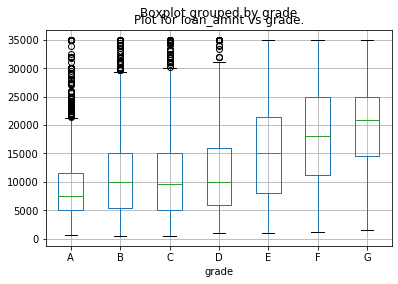

In [222]:
plt.figure(figsize=(10,5))
lg=initial_loan_data_frame.boxplot(column='loan_amnt', by='grade')
lg.set_title("Plot for loan_amnt vs grade.")

observations:<br>
    It is clear that high the loan amount they given low grade indicate that risk of default loan

#### loan_amnt,verification_status & loan status

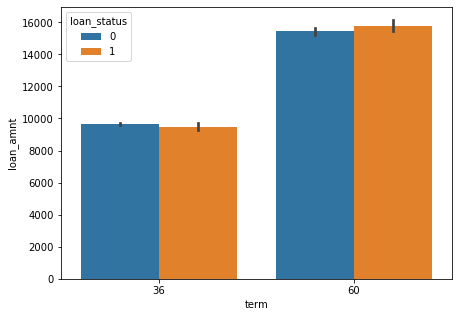

In [223]:
plt.figure(figsize=(7,5))
sns.barplot(x='term', y='loan_amnt', hue="loan_status", data=initial_loan_data_frame)

observations:<br>
    When loan amount is huge mostly term will be high and rish for default loan is also high

#### Loan amount vs SubGrade vs Term

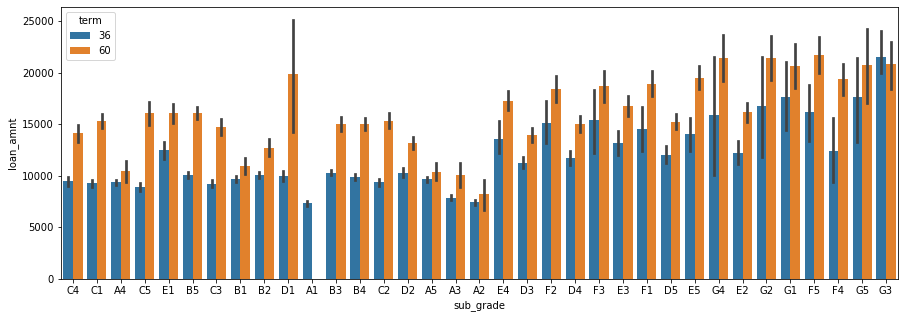

In [224]:
plt.figure(figsize=(15,5))
sns.barplot(x='sub_grade', y='loan_amnt', hue="term", data=initial_loan_data_frame)

observations:<br>
    When loan amount is high it will fall under low grade and high term which will rise risk default loans.

#### Loan amount,addr_state & loan Status

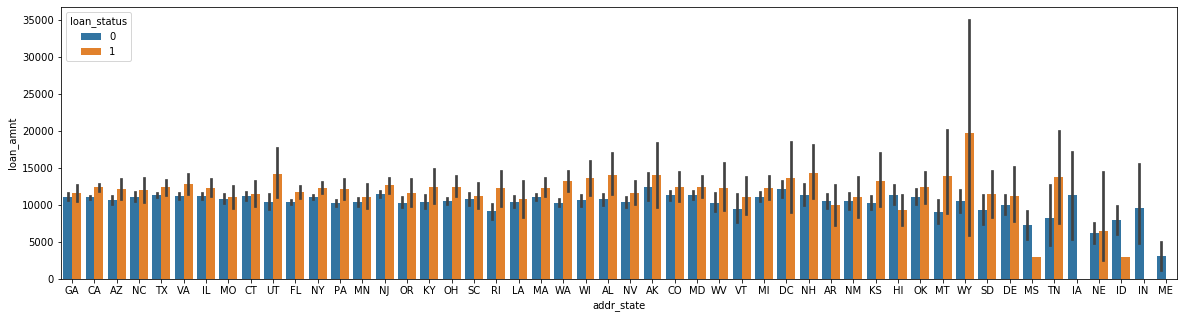

In [225]:
plt.figure(figsize=(20,5))
sns.barplot(x='addr_state', y='loan_amnt', hue='loan_status',data=initial_loan_data_frame)

observations:<br>
    Few city had high loan amount it lead to default loans

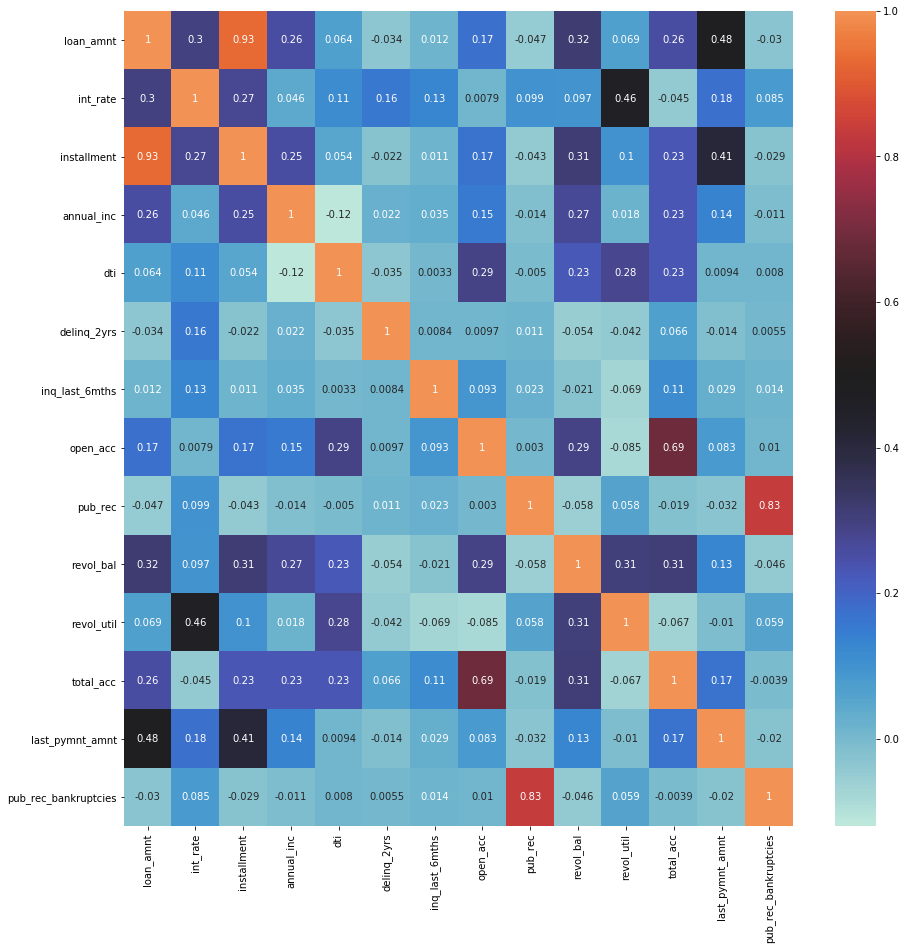

In [226]:
plt.figure(figsize=(15,15))
cont_var= ['loan_amnt', 'int_rate', 'installment','emp_length', 'annual_inc','dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies']
corre = initial_loan_data_frame[cont_var].corr()
sns.heatmap(corre, annot=True, center=0.5)

observations:<br>
    We can get correlation between variables<br>
    pub_rec_bankrupt is correlated to pub_rec<br>
    Loan amount and installment are correlated